<a href="https://colab.research.google.com/github/AlbertoOstorga/Hola-Mundo/blob/main/Valores_atipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar datos**

In [1]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [43]:
#Carga desde un archivo csv sin índice
data1= pd.read_csv('Inmuebles_sin_nulos.csv')
data= data1.drop(['Unnamed: 0'], axis=1) # 1: columna  0: filas
data.head(10)

,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,01/01/2004 00:00,Parking,Alquiler,Lleida,291.0,9133903,19/06/2004 00:00,Carmen
1,01/01/2004 00:00,Local,Venta,Girona,185.0,1945424,19/04/2004 00:00,Pedro
2,01/01/2004 00:00,Oficina,Alquiler,Girona,82.0,1121906,08/11/2004 00:00,Joaquín
3,02/01/2004 00:00,Parking,Alquiler,Girona,285.0,1121906,27/04/2004 00:00,Jesús
4,02/01/2004 00:00,Suelo,Venta,Tarragona,152.0,185000,10/07/2004 00:00,María
5,03/01/2004 00:00,Industrial,Alquiler,Girona,131.0,953156,05/09/2004 00:00,Pedro
6,03/01/2004 00:00,Industrial,Alquiler,Tarragona,170.2,406686,07/06/2004 00:00,Pedro
7,03/01/2004 00:00,Oficina,Venta,Girona,235.0,2158475,31/10/2004 00:00,Jesús
8,04/01/2004 00:00,Piso,Alquiler,Lleida,108.0,1024380,28/12/2004 00:00,Jesús
9,04/01/2004 00:00,Parking,Venta,Lleida,299.0,2042768,06/10/2004 00:00,Joaquín


In [51]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Fecha Alta      0
Tipo            0
Operación       0
Provincia       0
Superficie      0
Precio Venta    0
Fecha Venta     0
Vendedor        0
dtype: int64

# **Gráficas**

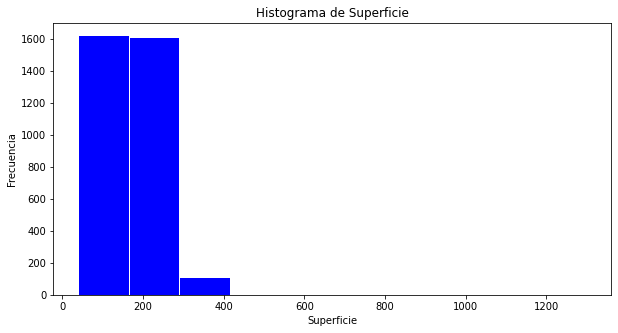

In [67]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize = (10,5))
plt.hist(x=data["Superficie"], color='blue' , rwidth = 0.98)
plt.title('Histograma de Superficie')
plt.xlabel('Superficie')
plt.ylabel('Frecuencia')

plt.show() #Dibujamos el histograma

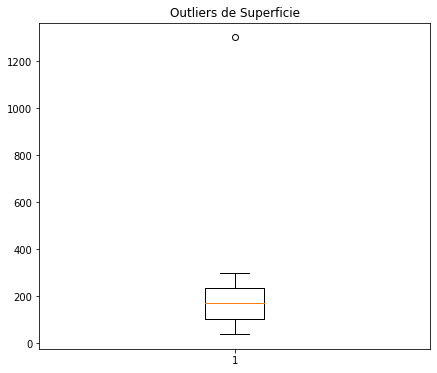

In [68]:
#Realizamos el diagrama de caja o bigote
fig = plt.figure(figsize = (7,6))
plt.boxplot(data['Superficie'])
plt.title("Outliers de Superficie")
plt.show() #Dibujamos el diagrama 

# **Método de desviación estándar**

In [69]:
#Método aplciando desviación estándar, Encuentro los valores extremos 
y = data["Superficie"]
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print('Limite Superior permitido', Limite_Superior)
print('Limite Superior permitido', Limite_Inferior)

Limite Superior permitido 403.7966045066274
Limite Superior permitido -62.7251031581107


In [70]:
#Encontramos Outliers
outliers = data[(y>Limite_Superior)|(y<Limite_Inferior)]

outliers

,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
1676,27/08/2005 00:00,Industrial,Venta,Lleida,1300.0,2625600,08/01/2006 00:00,María


In [71]:
#Obtenemos datos limpios
data_clean = data[(y<=Limite_Superior) & (y>=Limite_Inferior)]
data_clean

,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,01/01/2004 00:00,Parking,Alquiler,Lleida,291.0,9133903,19/06/2004 00:00,Carmen
1,01/01/2004 00:00,Local,Venta,Girona,185.0,1945424,19/04/2004 00:00,Pedro
2,01/01/2004 00:00,Oficina,Alquiler,Girona,82.0,1121906,08/11/2004 00:00,Joaquín
3,02/01/2004 00:00,Parking,Alquiler,Girona,285.0,1121906,27/04/2004 00:00,Jesús
4,02/01/2004 00:00,Suelo,Venta,Tarragona,152.0,185000,10/07/2004 00:00,María
...,...,...,...,...,...,...,...,...
3332,29/04/2007 00:00,Industrial,Alquiler,Lleida,221.0,1450644,19/06/2030 00:00,María
3333,29/04/2007 00:00,Piso,Alquiler,Girona,55.0,454080,19/06/2030 00:00,María
3334,30/04/2007 00:00,Suelo,Venta,Tarragona,78.0,740688,19/06/2030 00:00,María
3335,30/04/2007 00:00,Piso,Alquiler,Barcelona,88.0,397408,19/06/2030 00:00,María


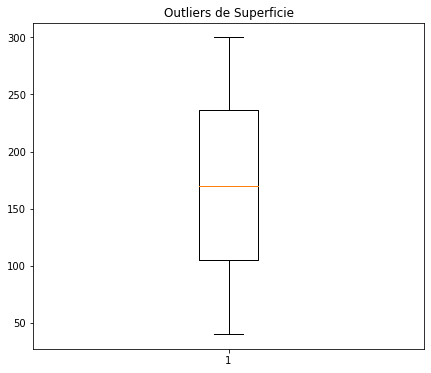

In [72]:
#Realizamos el diagrama de caja o bigote
fig = plt.figure(figsize = (7,6))
plt.boxplot(data_clean['Superficie'])
plt.title("Outliers de Superficie")
plt.show() #Dibujamos el diagrama 

In [73]:
#Método aplicación Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = data["Superficie"]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print('Limite superior permitido', Limite_Superior_iqr)
print('Limite inferior permitido', Limite_Inferior_iqr)

Limite superior permitido 432.5
Limite inferior permitido -91.5


In [74]:
#Encontramos Outliers
outliers_iqr = data [(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
1676,27/08/2005 00:00,Industrial,Venta,Lleida,1300.0,2625600,08/01/2006 00:00,María


In [75]:
#Obtenemos datos limpios
data_clean_iqr = data[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data_clean_iqr

,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,01/01/2004 00:00,Parking,Alquiler,Lleida,291.0,9133903,19/06/2004 00:00,Carmen
1,01/01/2004 00:00,Local,Venta,Girona,185.0,1945424,19/04/2004 00:00,Pedro
2,01/01/2004 00:00,Oficina,Alquiler,Girona,82.0,1121906,08/11/2004 00:00,Joaquín
3,02/01/2004 00:00,Parking,Alquiler,Girona,285.0,1121906,27/04/2004 00:00,Jesús
4,02/01/2004 00:00,Suelo,Venta,Tarragona,152.0,185000,10/07/2004 00:00,María
...,...,...,...,...,...,...,...,...
3332,29/04/2007 00:00,Industrial,Alquiler,Lleida,221.0,1450644,19/06/2030 00:00,María
3333,29/04/2007 00:00,Piso,Alquiler,Girona,55.0,454080,19/06/2030 00:00,María
3334,30/04/2007 00:00,Suelo,Venta,Tarragona,78.0,740688,19/06/2030 00:00,María
3335,30/04/2007 00:00,Piso,Alquiler,Barcelona,88.0,397408,19/06/2030 00:00,María


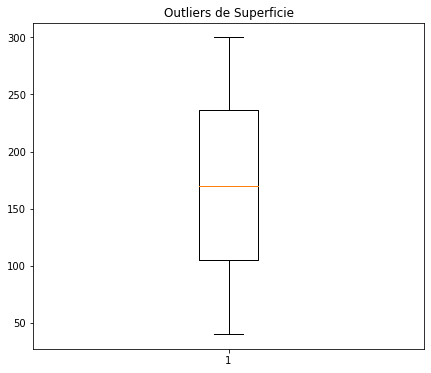

In [76]:
#Realizamos el diagrama de caja o bigote
fig = plt.figure(figsize = (7,6))
plt.boxplot(data_clean_iqr['Superficie'])
plt.title("Outliers de Superficie")
plt.show() #Dibujamos el diagrama 